In [2]:
import torch
from PIL import Image
from torchvision import transforms

# 1. モデル読み込み
model = torch.jit.load("../model/gtsrb_model.ts")  # パスを適宜修正
model.eval()

# 2. 前処理関数（学習時と同じ）
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor()
])

# 3. 推論対象画像の読み込み
img_path = "../data/test/00001.png"  # 任意のテスト画像
img = Image.open(img_path)
input_tensor = transform(img).unsqueeze(0)  # (1, 3, 32, 32)

# 4. 推論
with torch.no_grad():
    output = model(input_tensor)
    predicted_class = output.argmax(1).item()

# 5. 結果出力
print(f"画像: {img_path}")
print(f"予測されたクラス: {predicted_class}")


画像: ../data/test/00001.png
予測されたクラス: 1


In [3]:
class_names = {
    0: "Speed limit (20km/h)",
    1: "Speed limit (30km/h)",
    2: "Speed limit (50km/h)",
    3: "Speed limit (60km/h)",
    4: "Speed limit (70km/h)",
    5: "Speed limit (80km/h)",
    6: "End of speed limit (80km/h)",
    7: "Speed limit (100km/h)",
    8: "Speed limit (120km/h)",
    9: "No passing",
    10: "No passing for vehicles > 3.5 metric tons",
    11: "Right-of-way at the next intersection",
    12: "Priority road",
    13: "Yield",
    14: "Stop",
    15: "No vehicles",
    16: "Vehicles > 3.5 metric tons prohibited",
    17: "No entry",
    18: "General caution",
    19: "Dangerous curve to the left",
    20: "Dangerous curve to the right",
    21: "Double curve",
    22: "Bumpy road",
    23: "Slippery road",
    24: "Road narrows on the right",
    25: "Road work",
    26: "Traffic signals",
    27: "Pedestrians",
    28: "Children crossing",
    29: "Bicycles crossing",
    30: "Beware of ice/snow",
    31: "Wild animals crossing",
    32: "End of all speed and passing limits",
    33: "Turn right ahead",
    34: "Turn left ahead",
    35: "Ahead only",
    36: "Go straight or right",
    37: "Go straight or left",
    38: "Keep right",
    39: "Keep left",
    40: "Roundabout mandatory",
    41: "End of no passing",
    42: "End of no passing by vehicles > 3.5 metric tons"
}


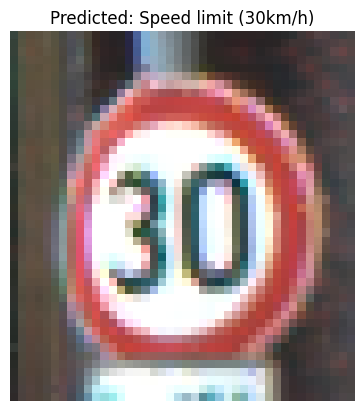

In [4]:
import matplotlib.pyplot as plt

# クラス名を取得（なければ "Class {ID}" を表示）
class_name = class_names.get(predicted_class, f"Class {predicted_class}")

# 推論画像の表示（日本語非対応でも問題ない）
plt.imshow(img)
plt.title(f"Predicted: {class_name}")
plt.axis('off')
plt.show()
